In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
df.shape

(683, 11)

In [ ]:
df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [ ]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
df.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

In [ ]:
df.Mitoses.value_counts()

1     563
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [50]:
X = df.drop(columns=["Sample code number","Class"],axis=1).values
y = df.Class.values

In [51]:
from  sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
clf = LogisticRegression()


In [55]:
clf.fit(X_train,y_train)

LogisticRegression()

In [56]:
clf.score(X_test,y_test)

0.9635036496350365

In [57]:
import seaborn as sns

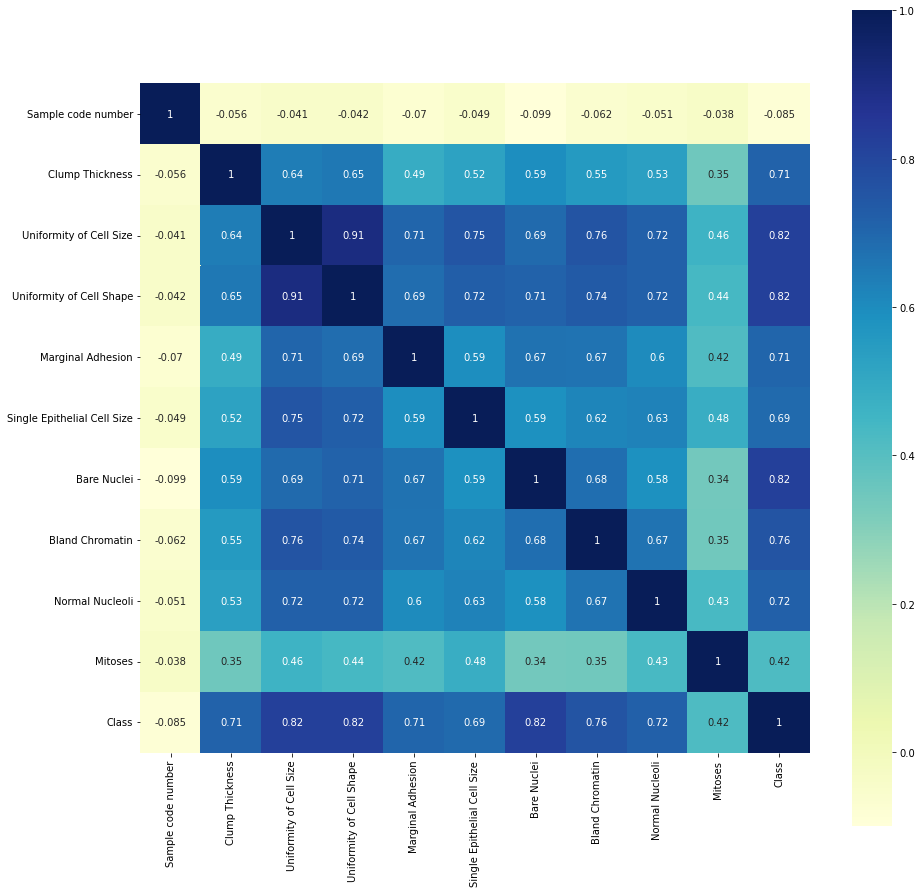

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),square=True,cmap="YlGnBu",annot=True)

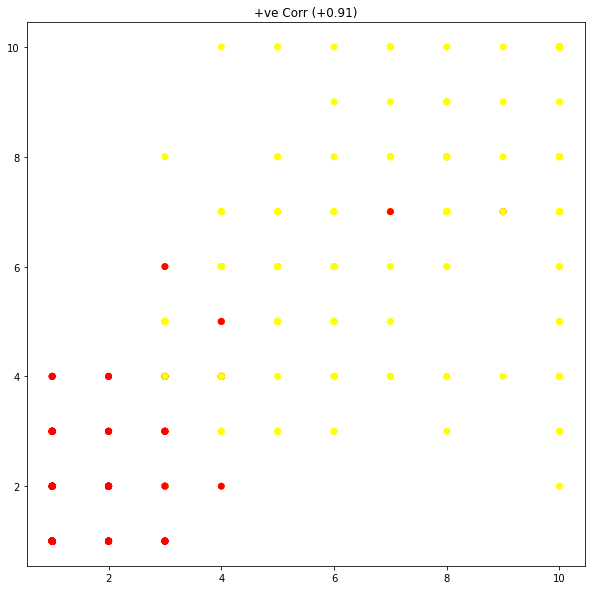

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(df["Uniformity of Cell Size"],df["Uniformity of Cell Shape"],c=df.Class,cmap="autumn")
plt.title("+ve Corr (+0.91)");

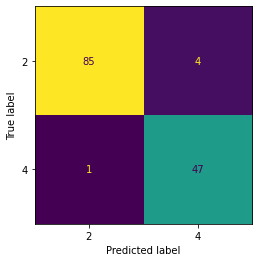

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,clf.predict(X_test),colorbar=False);